<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<b>Тимофей, привет!</b>

Меня зовут Владимир Бердников, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это не совсем удобно для тебя — дай знать, и мы перейдем на "вы". Моя цель не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь улучшить навыки. 
    
Пожалуйста, не перемещай, не удаляй и не правь мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

При проверке работы я буду отмечать комментарии цветом и примечанием. В конце заголовка комментария указан номер итерации проверки.
<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Комментарии такого цвета нужно исправить, иначе проект не будет принят. 
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Такой комментарий является рекомендацией или советом. Mожешь учесть их при выполнении задания.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Так выделены все остальные комментарии, включая позитивные моменты, пояснения и рассуждения.
</div>  
    
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте — пиши об этом в комментариях, например, с помощью такого кода в markdown ячейке:

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Ок.   

### Загрузка данных и подготовка их к анализу

Развлекательное приложение Procrastinate Pro+ последние несколько месяцев терпит убытки, несмотря на огромные вложения в рекламу. Задача — разобраться в причинах и помочь компании выйти в плюс. 

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях;
* выгрузка их покупок за этот период;
* рекламные расходы.

Предстоит изучить:
* откуда приходят пользователи и какими устройствами они пользуются;
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент;
* когда расходы на привлечение клиента окупаются;
* какие факторы мешают привлечению клиентов.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Хорошо, есть вступление. Оно обязательно должно быть в работе. Также стоит добавить заголовок проекта

#### Загрузка и изучение данных

Подключаем библеотеки.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

Загружаем данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

In [2]:
try:
    visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'), # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'),  # покупки
    pd.read_csv('/datasets/costs_info_short.csv'),  # траты на рекламу
)    
except:
    visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'), # журнал сессий
    pd.read_csv('orders_info_short.csv'),  # покупки
    pd.read_csv('costs_info_short.csv'),  # траты на рекламу
)

Изучаем данные, смотрим есть ли пропуски и корректные ли типы данных.

In [3]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Считаем количество дубликатов в столбцах.

In [6]:
print(f'В таблице с данными о визитах {visits.duplicated().sum()} дубликатов')
print(f'В таблице с данными о заказах {orders.duplicated().sum()} дубликатов')
print(f'В таблице с данными о рекламных расходах {costs.duplicated().sum()} дубликатов')

В таблице с данными о визитах 0 дубликатов
В таблице с данными о заказах 0 дубликатов
В таблице с данными о рекламных расходах 0 дубликатов


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Я бы советовал создать функцию и/или цикл для вывода информации о таблице (метод `info()`, проверка дубликатов и пр.), чтобы в дальнейшем в следующих проектах переиспользовать, не тратить время на код с нуля. О создании функций было в теории Практикума в уроке "Собственные функции" (тема "Функции" в разделе "Базовый Python").
    
Заголовки добавить можно таким образом:
    
    print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m')


<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

😎 Урок "Собственные функции" посмотрел, очень информативно. Совет запомнил, в следующем проекте постараюсь реализовать, а сейчас отстаю от группы и хочу поскорее догнать)

*Обрабатывать пропуски и дубликаты не нужно, их нет. В столбцах с датами нужно исправить тип данных. Нужно изменить названия столбцов на более правильные.*

#### Предобработка данных

Исправляем названия столбцов и типы данных в стобцах с датами и временем.

In [7]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower()

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Оцениваем результаты предобработки данных.

In [8]:
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

In [9]:
print(visits['channel'].unique())
print(costs['channel'].unique())
print(visits['device'].unique())
visits['region'].unique()

['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']
['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']
['iPhone' 'Mac' 'Android' 'PC']


array(['United States', 'UK', 'France', 'Germany'], dtype=object)

*В таблицах с данными о визитах, заказах и рекламных расходах нет дубликатов и пропусков, названия столбцов корректные, тип данных в столбцах с датой и временем соответствует сохраненным в них значениям.*

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Хорошо, пропуски и дубликаты проверены, соответствующие типы данных изменены, названия колонок переименованы. 

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Еще можно проверить наличие неявных дубликатов в колонках с категориальными значениями

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

😎 Не совсем понял, типа так: `visits['channel'].unique()`? Я на самом деле делал, но потом стер, так как дубликатов не нашел. Теперь добавил выше, над твоим комментарием.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Да, так

### Определение функций для расчёта и анализа LTV, ROI, удержания и конверсии

#### Объявление функций для вычисления значений метрик

Объявляем функцию для создания пользовательских профилей.

In [10]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    # методом count, потому что мы уже группировали их выше
    # тогда зачем нам nunique использовать? они и так уникальны
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'count'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Объявляем функцию для расчёта удержания.

In [11]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Объявляем функцию для расчёта конверсии.

In [12]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Объявляем функцию для расчёта LTV и ROI.

In [13]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Объявление функций для построения графиков

Создаем функции для сглаживания данных.

In [14]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Создаем функции для визуализации удержания.

In [15]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

Создаем функции для визуализации конверсии.

In [16]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Создаем функции для визуализации LTV и ROI.

In [17]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

*Заданы функции для вычисления значений метрик и для построения графиков.*

### Исследовательский анализ данных

#### Составление профилей пользователей, определение временного диапазона данных

In [18]:
profiles = get_profiles(visits, orders, costs)
print(f'Минимальная дата привлечения пользователей: {profiles["first_ts"].min()}')
print(f'Максимальная дата привлечения пользователей: {profiles["first_ts"].max()}')
print(profiles.shape)
profiles.head()

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41
Максимальная дата привлечения пользователей: 2019-10-27 23:59:04
(150008, 9)


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


*Определена минимальная и максимальная даты привлечения пользователей, как и было указано в описании, есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Создана таблица с профилями пользователей.*

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Минимальная и максимальная даты привлечения пользователей определены. Еще в описании проекта написано: "Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года". Желательно дописать, соответствуют ли результаты описанию. 

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

😎 Добавил выше.

#### Создание таблиц с разбивкой пользователей по странам, устройствам, каналам

Строим таблицу, для каждой страны отражающую количество пользователей, количество платящих пользователей, долю платящих пользователей от общего числа пользователей из этой страны. Также добавим столбец с долей платящих пользователей страны от всех платящих пользователей.

In [19]:
payer_country_distr = (
    profiles.groupby('region').agg({'user_id':'count', 'payer':'sum'})
    .rename(columns={'user_id':'n_users', 'payer':'n_payers'})
)
payer_country_distr['paying_part']=payer_country_distr['n_payers']/payer_country_distr['n_users']
payer_country_distr['part_of_all_payers']=payer_country_distr['n_payers']/payer_country_distr['n_payers'].sum()
payer_country_distr.sort_values(by='n_payers', ascending=False).head().style.format({'part_of_all_payers': "{:.2%}"})

,n_users,n_payers,paying_part,part_of_all_payers
region,,,,
United States,100002,6902,0.069019,77.72%
UK,17575,700,0.039829,7.88%
France,17450,663,0.037994,7.47%
Germany,14981,616,0.041119,6.94%


*Из США в приложение приходит намного больше пользователей, чем из других стран, доля платящих пользователей в США тоже значительно выше, чем в других странах. Два этих параметра образуют 6902 платящих пользователя в США, что составляет примерно 78% от общего числа платящих пользователей во всех странах.*

Строим таблицу, для каждого устройства отражающую количество пользователей, количество платящих пользователей, долю платящих пользователей от общего числа пользователей этого устройства. Также добавим столбец с долей платящих пользователей устройства от всех платящих пользователей.

In [20]:
payer_device_distr = (
    profiles.groupby('device').agg({'user_id':'count', 'payer':'sum'})
    .rename(columns={'user_id':'n_users', 'payer':'n_payers'})
)
payer_device_distr['paying_part']=payer_device_distr['n_payers']/payer_device_distr['n_users']
payer_device_distr['part_of_all_payers']=payer_device_distr['n_payers']/payer_device_distr['n_payers'].sum()
payer_device_distr.sort_values(by='n_payers', ascending=False).head().style.format({'part_of_all_payers': "{:.2%}"})

,n_users,n_payers,paying_part,part_of_all_payers
device,,,,
iPhone,54479,3382,0.062079,38.08%
Android,35032,2050,0.058518,23.08%
Mac,30042,1912,0.063644,21.53%
PC,30455,1537,0.050468,17.31%


*Чаще всего пользователи приложения Procrastinate Pro+ используют IPhone. Доля платящих пользователей у IPhone не сильно отличается от доли платящих пользователей с другими марками телефона, даже немного уступая Mac. Число платящих пользователей, использующих IPhone, значительно выше, чем число платящих пользователей, использующих какую-либо другую марку телефона. Доля платящих пользователей, использующих IPhone - приблизительно 38%.*

Строим таблицу, для каждого канала привлечения отражающую количество пользователей, количество платящих пользователей, долю платящих пользователей от общего числа пользователей, привлеченных этим каналом. Также добавим столбец с долей платящих пользователей, привлеченных этим каналом, от всех платящих пользователей.

In [21]:
payer_channel_distr = (
    profiles.groupby('channel').agg({'user_id':'count', 'payer':'sum'})
    .rename(columns={'user_id':'n_users', 'payer':'n_payers'})
)
payer_channel_distr['paying_part']=payer_channel_distr['n_payers']/payer_channel_distr['n_users']
payer_channel_distr['part_of_all_payers']=payer_channel_distr['n_payers']/payer_channel_distr['n_payers'].sum()
payer_channel_distr.sort_values(by='n_payers', ascending=False).style.format({'part_of_all_payers': "{:.2%}"})

,n_users,n_payers,paying_part,part_of_all_payers
channel,,,,
FaceBoom,29144,3557,0.122049,40.05%
TipTop,19561,1878,0.096007,21.15%
organic,56439,1160,0.020553,13.06%
WahooNetBanner,8553,453,0.052964,5.10%
AdNonSense,3880,440,0.113402,4.95%
RocketSuperAds,4448,352,0.079137,3.96%
LeapBob,8553,262,0.030633,2.95%
OppleCreativeMedia,8605,233,0.027077,2.62%
lambdaMediaAds,2149,225,0.104700,2.53%


*Рекламный источник, привлекший наибольшее количество пользователей - FaceBoom. Доля платящих пользователей в нем тоже выше, чем доля платящих пользователей от общего числа пользователей, привлеченных другими источниками. Лидерство в обоих этих показателях обеспечивает FaceBoom наибольшее абсолютное количество платящих пользователей - 3557. FaceBoom привлек 40% платящих пользователей от общего числа среди 11 различных каналов привлечения.*

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Хорошо, таблицы созданы, доли платящих пользователей рассчитаны, результаты прокомментированы. Но что можно сделать лучше:
    
* создать функцию для выведения трех таблиц, т.к. код во многом повторяется
* вместо деления использовать в `agg()` готовую функцию, которая позволяет определить долю платящих (в колонке с платящими содержатся только True/False)
* округлить значения в колонке с долей платящих пользователей, например, до четырех знаков или можно вывести все значения в виде `12.20%`, округлив, например, до двух знаков, используя `style.format()` ([тут](https://sky.pro/wiki/python/otobrazhenie-data-frame-pandas-s-formatirovaniem-v-python/) ссылка на примеры). Вместо `f` можно указать `%`.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

😎 Сразу думал так сделать, но чет не вышло и я подумал что и так сойдет. Теперь исправил.

### Маркетинг

#### Анализ распределения расходов на маркетинг по различным рекламным источникам

Считаем общую сумму расходов на маркетинг, для надежности двумя способами.

In [22]:
a = round(profiles['acquisition_cost'].sum(), 1)
b = round(costs['costs'].sum(), 1)
if a==b:
    print(f'Общая сумма расходов на маркетинг: {a}')
else:
    print('Привет ревьюер!')

Общая сумма расходов на маркетинг: 105497.3


Строим график распределения расходов по рекламным источникам.

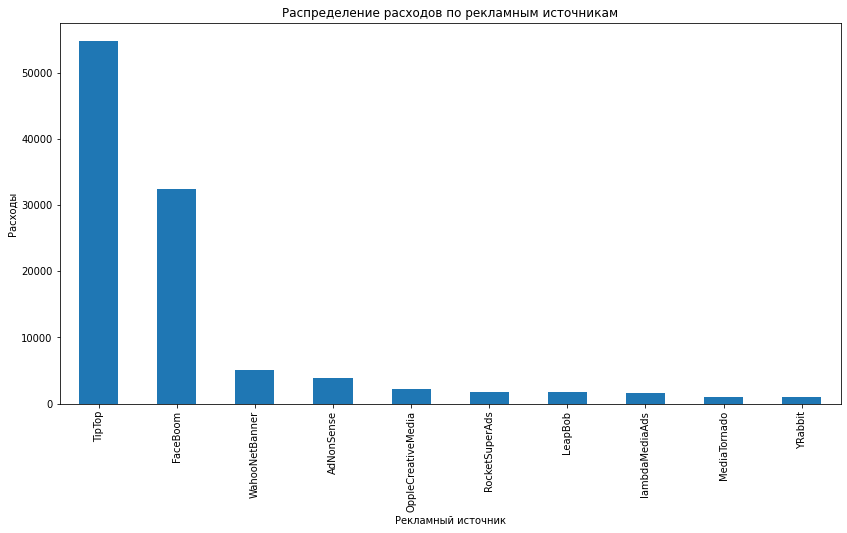

In [23]:
costs_channel_distr = costs.groupby('channel').agg({'costs':'sum'})
costs_channel_distr.sort_values(by='costs', ascending=False).plot(kind='bar', figsize=(14, 7), legend=False)
plt.title('Распределение расходов по рекламным источникам')
plt.xlabel('Рекламный источник')
plt.ylabel('Расходы')
plt.show()

Отобразим таблицу распределения расходов по рекламным источникам.

In [24]:
costs_channel_distr['proportion'] = costs_channel_distr['costs']/105497.3
costs_channel_distr.sort_values(by='costs', ascending=False).style.format({'proportion': "{:.2%}"})

,costs,proportion
channel,,
TipTop,54751.300000,51.90%
FaceBoom,32445.600000,30.75%
WahooNetBanner,5151.000000,4.88%
AdNonSense,3911.250000,3.71%
OppleCreativeMedia,2151.250000,2.04%
RocketSuperAds,1833.000000,1.74%
LeapBob,1797.600000,1.70%
lambdaMediaAds,1557.600000,1.48%
MediaTornado,954.480000,0.90%


*Больше половины от общих расходов на маркетинг уходит на рекламный канал TipTop - 54751 из 105497, то есть около 52%. Следом идет FaceBoom - лидер по привлечению платящих клиентов, на него расходуется около 31% от всех рекламных затрат.*

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Да, в лидерах TipTop и FaceBoom. 

#### Построение графиков с визуализацией динамики изменения расходов во времени по неделям и по месяцам по каждому источнику.

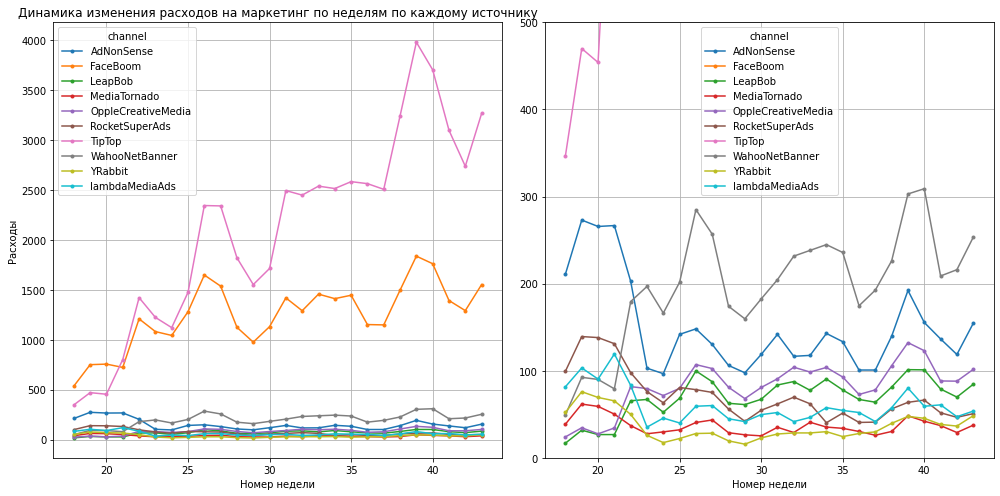

In [25]:
costs['week']=pd.to_datetime(costs['dt']).dt.isocalendar().week
weekly_costs_change = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
ax1 = plt.subplot(1, 2, 1)
weekly_costs_change.plot(figsize=(14,7), grid=True, style='.-', ax=ax1)
plt.title('Динамика изменения расходов на маркетинг по неделям по каждому источнику')
plt.xlabel('Номер недели')
plt.ylabel('Расходы')

ax2 = plt.subplot(1, 2, 2)
weekly_costs_change.plot(figsize=(14,7), grid=True, style='.-', ax=ax2)
plt.xlabel('Номер недели')
plt.tight_layout()
plt.ylim(0, 500)
plt.show()

*В первых неделях мая расходы на рекламу в различных источниках составляли в среднем столько же, сколько и в последних неделях октября, у всех источников затраты на рекламу в неделю находились в пределах 310, за исключением TipTop и FaceBoom. Для TipTop расходы на рекламу в неделю в начале мая составляли около 400, к концу октября увеличившись до приблизительно 3250. Расходы на рекламу FaceBoom в 18ую неделю составили порядка 550, к 43ей неделе увеличившись до приблизительно 1600.*

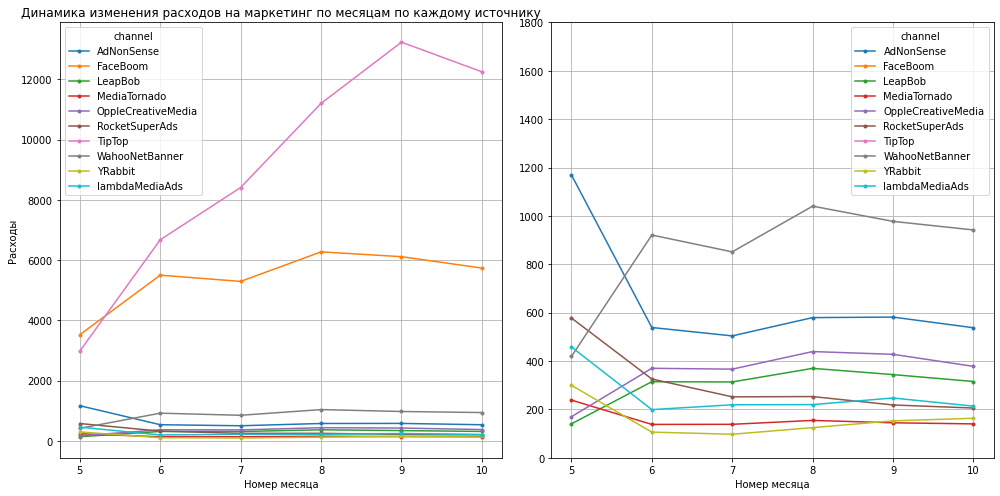

In [26]:
costs['month']=pd.to_datetime(costs['dt']).dt.month
monthly_costs_change = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
ax1 = plt.subplot(1, 2, 1)
monthly_costs_change.plot(figsize=(14,7), grid=True, style='.-', ax=ax1)
plt.title('Динамика изменения расходов на маркетинг по месяцам по каждому источнику')
plt.xlabel('Номер месяца')
plt.ylabel('Расходы')

ax2 = plt.subplot(1, 2, 2)
monthly_costs_change.plot(figsize=(14,7), grid=True, style='.-', ax=ax2)
plt.xlabel('Номер месяца')
plt.tight_layout()
plt.ylim(0, 1800)
plt.show()

*График динамики изменения расходов по месяцам подтверждает, что расходы на рекламу для TipTop и FaceBoom сильно выросли, относительно других рекламных источников и относительно начальных показателей. В мае затраты на рекламу в TipTop составили около 3500, тогда как в октябре этот показатей вырос до примерно 12000. Среди остальных платформ по расходам на маркетинг лидирует WahooNetBanner.*

#### Нахождение средней стоимости привлечения одного пользователя из каждого источника

In [27]:
channel_cac = (
    profiles.query('channel!="organic"').groupby('channel').agg({'acquisition_cost':'mean'}).
rename(columns={'acquisition_cost':'cac'})
)
channel_cac.sort_values(by='cac', ascending=False).style.format({'cac': "{:.2f}"})

,cac
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


*Используя профили пользователей, удалось рассчитать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Самыми "дорогими" оказались пользователи, привлеченные из TipTop - стоимость одного пользователя от туда около 2.80. Следом идут FaceBoom со стоимостью приблизительно 1.11 и AdNonSense со стоимостью близкой к 	1.01.*

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Хорошо, TipTop с отрывом опережает остальные каналы по САС. Я бы еще советовал округлить значения в таблице, например, до двух знаков, чтобы их проще было считывать

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

😎 Сделано

### Оценка окупаемости рекламы

Установим момент и горизонт анализа данных, считая, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

In [28]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 
profiles_filtered = profiles.query('channel!="organic"')

#### Анализ окупаемости рекламы c помощью графиков LTV, ROI, графиков динамики LTV, CAC и ROI

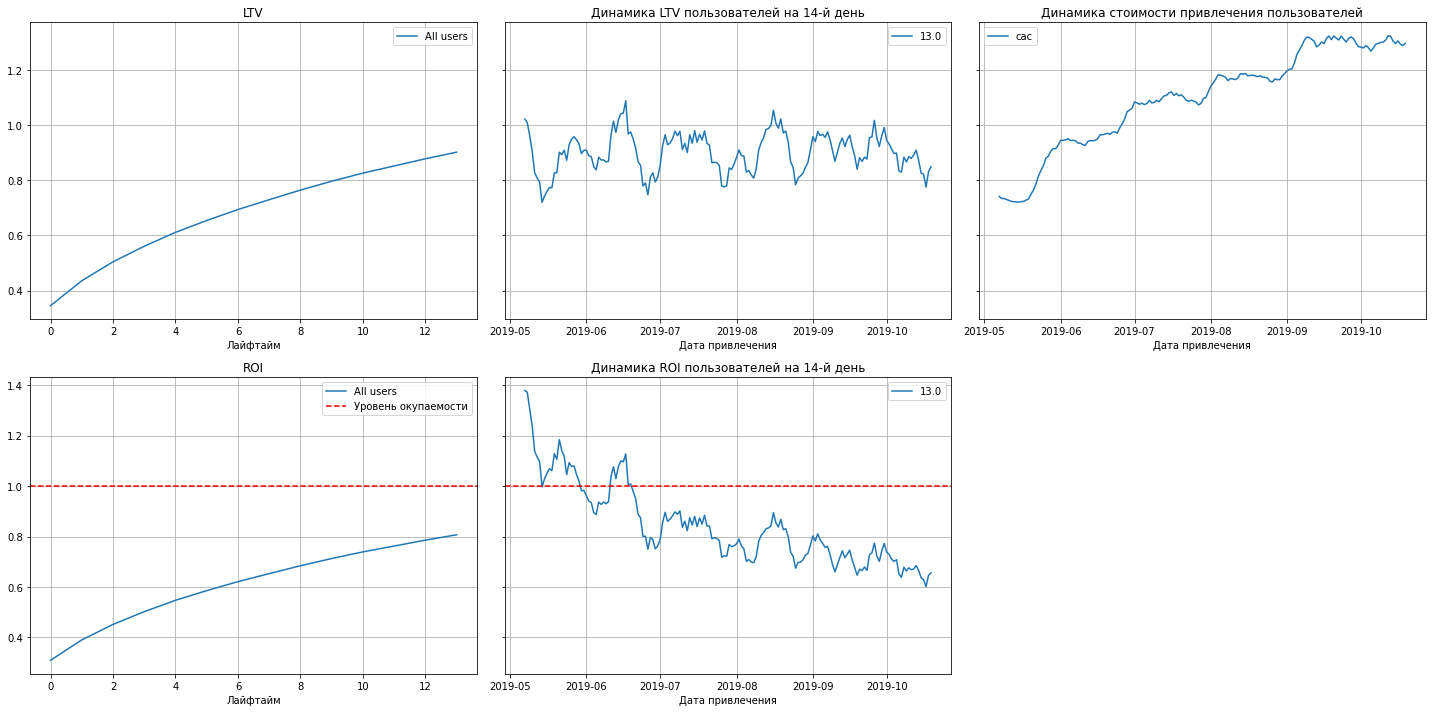

In [29]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

*Общая сумма денег, которую один клиент в среднем приносил компании со всех своих покупок на 14-ый день составляет около 0.90, стоимость привлечения одного клиента вначале мая была в районе 0.75, к концу октября увеличилась до приблизительно 1.3, таким образом окупаемость рекламных инвестиций за 14 дней, которая в начале мая составляла около 140%, то есть пользователи окупались на 14ый день, в октябре ROI упала до 65% - пользователи не окупаются. Во все месяцы, кроме мая, ROI был ниже 100% и продолжает снижаться.*

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ На графике явно видим, что реклама не окупается (ROI ниже единицы). 
     
LTV в компаниях, как правило, постоянно растет. Если бы мы увидели падение, это бы означало, скорее всего, наличие ошибки в расчетах. Но на графике LTV стабилен. 
    
Стоимость привлечения пользователей (CAC) со временем увеличивалась; она окупалась только в мае-июне. CAC может быть какой угодно в зависимости, например, от того, какая цена рекламы была установлена.    

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Здесь и ниже необходимо отфильтровать органических пользователей. В данном разделе мы оцениваем окупаемость рекламы. На органических пользователей мы же не тратим средства. С "органиками" результаты искажаются, т.к. учитываем тех, кто не видел рекламу.
    
Далее необходимо будет скорректировать выводы по итогам анализа. Убедиться, что под всеми графиками даны комментарии по LTV, CAC и ROI (по всем трем метрикам, а не по одной или двум). Желательно обратить внимание на всплески на графиках с динамикой ROI и CAC. Также прокомментировать все графики по удержанию и конверсии. Комментарии по содержанию оставлю после удаления "органиков".

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

😎 Торопился, и совсем не пришло это в голову) 
    
   Отфильтровал таблицу с профилями, убрав органических пользователей, изменил промежуточные и общие выводы.

#### Анализ конверсии и удержания привлеченных рекламой пользователей и динамики их изменения с помощью графиков конверсии и удержания

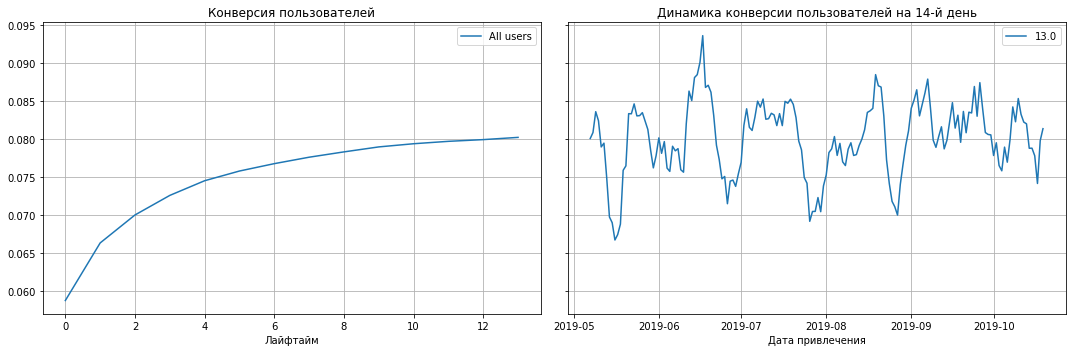

In [30]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

*Около 8% привлеченных рекламой пользователей совершали покупку в течение 14 дней после первого запуска приложения, в начале мая конверсия почти не отличается от конца октября, как правило падает в конце месяца и увеличивается в его середине.*

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Конверсия достигает уровня 8%. Дополнительно о том, какую конверсию в активацию считать хорошей и как ее улучшить можно прочитать [здесь](https://gopractice.ru/product/what-is-good-activation-rate/)

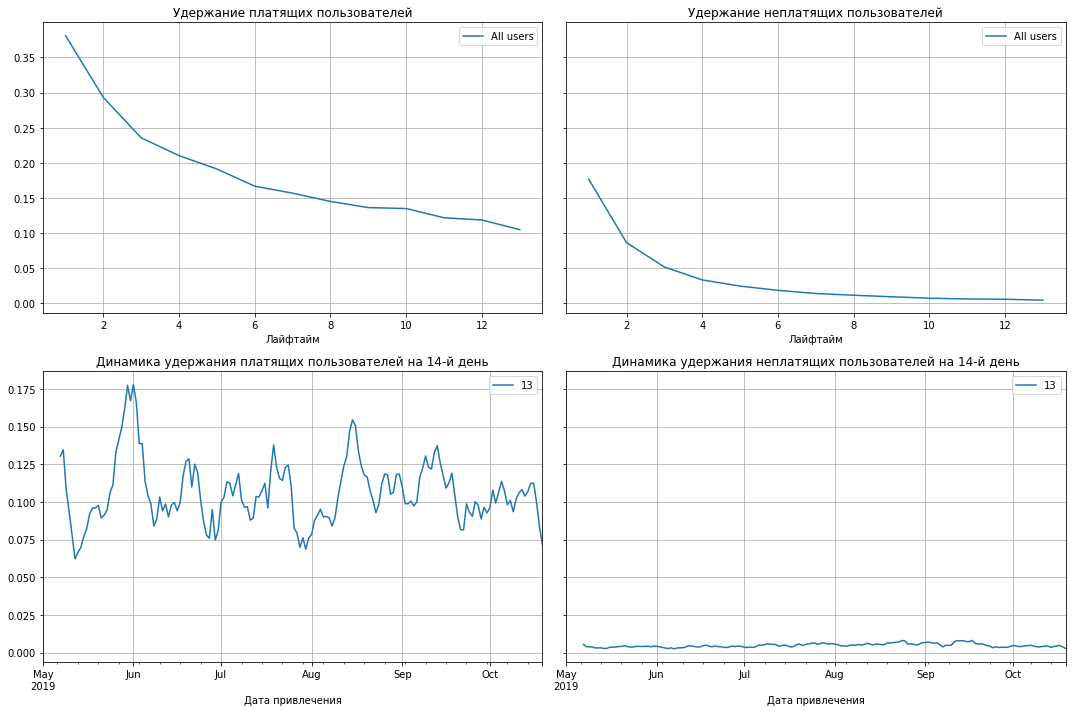

In [31]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

*Удержание платящих пользователей, привлеченных рекламой, опускается до приблизительно 10% к 14ому дню лайвтайма, оно закономерно выше удержания неплатящих, которое на 14ый день приближается к 0%. В течение всего изучаемого периода удержание неплатящих пользователей находились на относительно стабильном уровне, удержание платящих "скачет", возможно из-за того, что платящих пользователей значительно меньше. В начале мая на 14ый день после первой сессии в приложение заходили примерно 13% пользователей, в конце октября - примерно 7.5%.*

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Удержание достаточно стабильно как для платящих, так и для неплатящих пользователей; оно плавно снижается. Никаких аномалий не наблюдается. Можно допустить небольшой и кратковременный рост, но если бы удержание резко выросло, в таком случае, скорее всего, необходимо было бы перепроверить расчеты.

Как улучшить удержание, можно почитать в статье по [этой ссылке](https://gopractice.ru/product/retention/)

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Также необходимо проанализировать конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам. Это важно, т.к. там мы можем найти ценную информацию. Сейчас есть частичный ответ по общим графикам, но они не являются исчерпывающими, не дают более полного понимания о конверсии и удержании.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

😎 Чтож, в задании об этом ни слова не сказано, как и о том, что конверсию и удержание нужно делать именно для привлеченных рекламой пользователей, но теперь я осознал что это необходимо, и делаю соответствующие графики, рассчеты и выводы ниже, в пункте 5.3 

#### Анализ конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам

Находим ценную исчерпывающую информацию по графикам конверсии и удержания, с разбивкой по устройствам.

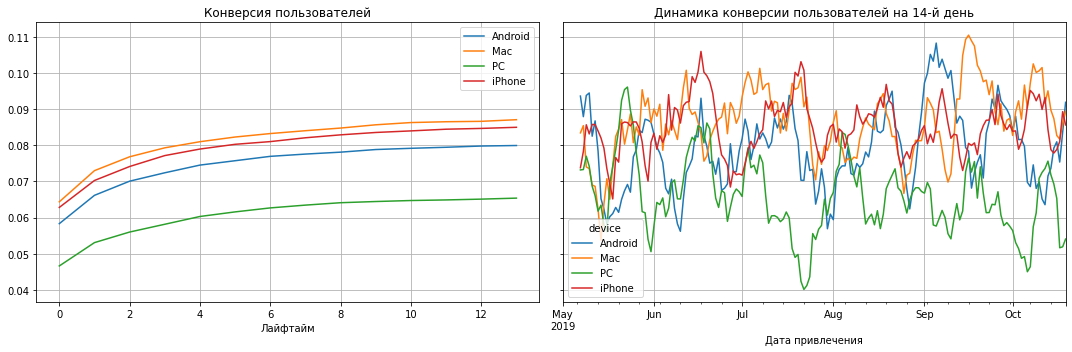

In [32]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

*Около 6.5% привлеченных рекламой пользователей PC совершали покупку в течение 14 дней после первого запуска приложения, у пользователей остальных платформ показатель конверсии 14ого дня выше 8%. В начале мая конверсия 14ого дня в срденем почти не отличается от конца октября, как правило падает по пол месяца, затем пол месяца возрастает для всех платформ.*

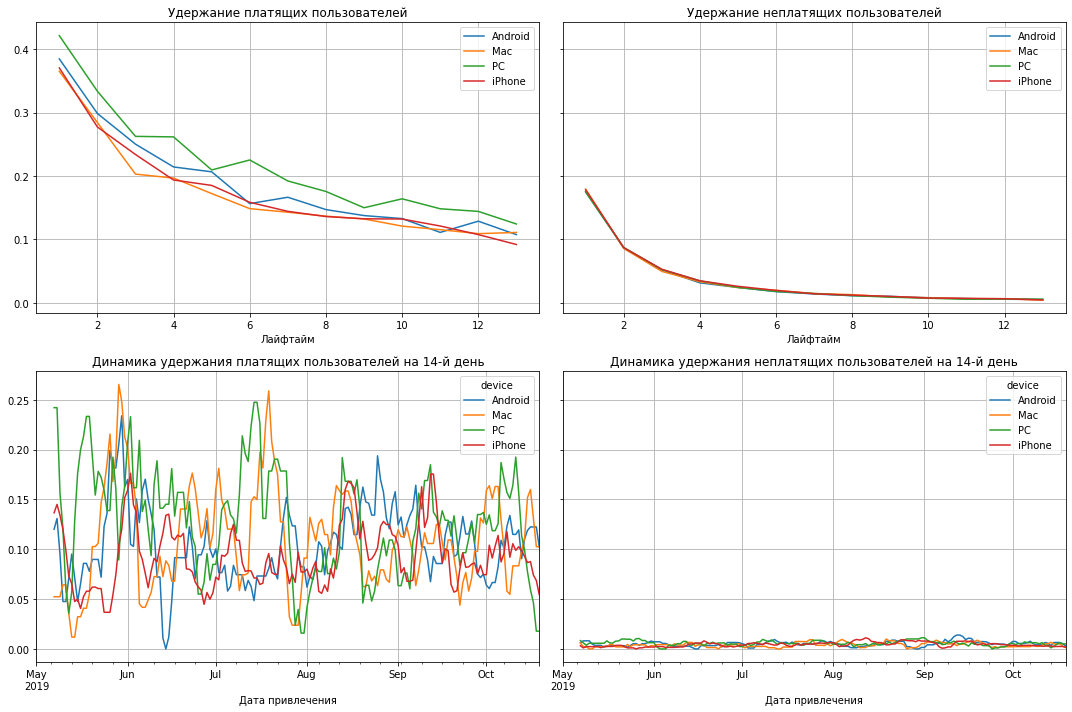

In [33]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

*Удержание платящих пользователей , привлеченных рекламой, опускается до приблизительно 10% к 14ому дню лайвтайма, оно закономерно выше удержания неплатящих, которое на 14ый день приближается к 0%. У различных устройств удержание примерно одинаковое. В течение всего изучаемого периода удержание неплатящих пользователей находились на относительно стабильном уровне, удержание платящих "скачет", возможно из-за того, что платящих пользователей значительно меньше. В начале мая на 14ый день после первой сессии в приложение заходило больше пользователей чем в конце октября.*

Анализируем конверсию и удержание с разбивкой по странам.

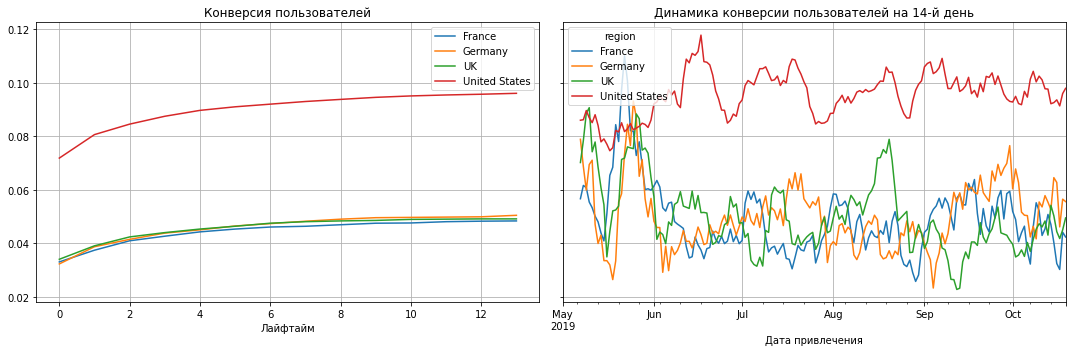

In [34]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

*Около 10% привлеченных рекламой пользователей из США совершали покупку в течение 14 дней после первого запуска приложения, у пользователей из всех остальных стран этот показатель в 2 раза ниже - в районе 5%. В начале мая конверсия 14ого дня для США чуть ниже, чем в конце октября, у остальных стран конверсия в октября наоборот немного снизилась, по сравнению с маем.*

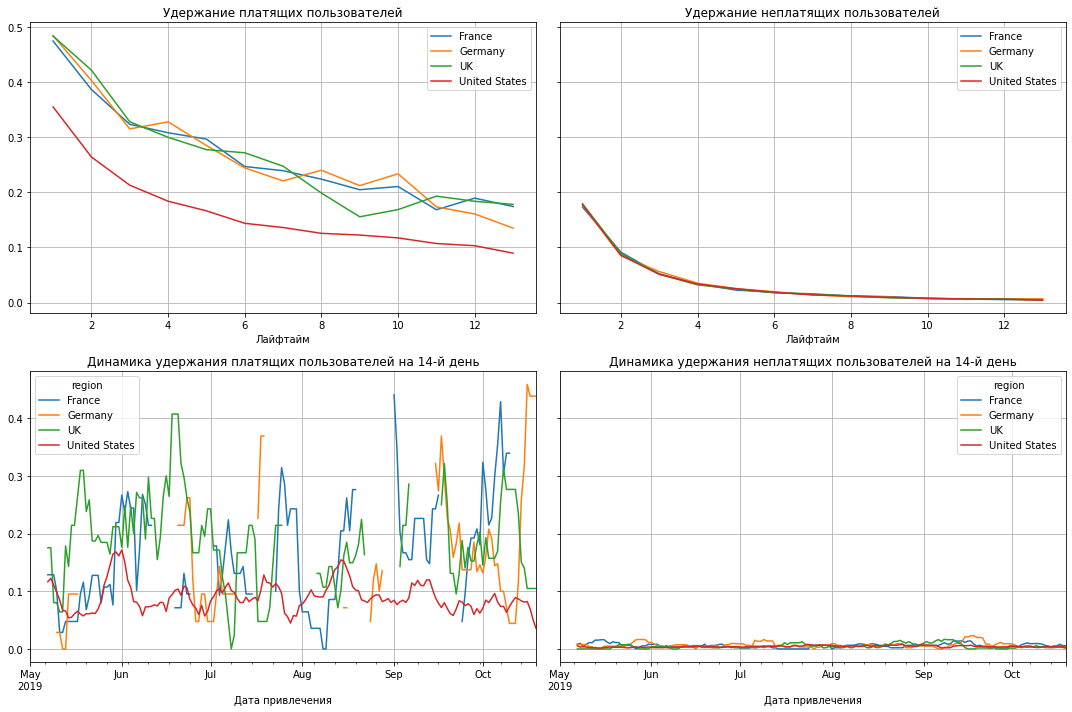

In [35]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

*Удержание платящих пользователей, привлеченных рекламой, из США ниже, чем удержание пользователей из других стран, приблизительно 10% на 14ый день после первой сессии - против приблизительно 15%. У неплатящих пользователей оно примерно одинаковое вне зависимости от региона и на 14ый день стремится к нулю. Прекрасный график динамики удержания платящих пользоваталей на 14ый день с разбивкой по странам показывает, что этот показатель довольно нестабилен, вероятно, из-за малого числа платящих пользователей. По графику удержания неплатящих пользователей на 14ый день видно, что этот показатель стабильно очень низкий.*

Анализируем конверсию и удержание с разбивкой по каналам привлечения.

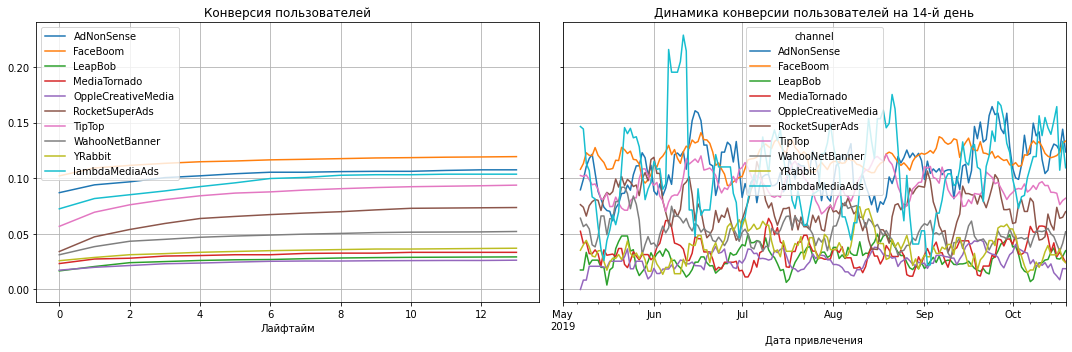

In [36]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

*Конверсия привлеченных из разных рекламных источников пользователей довольно сильно отличается друг от друга. Выше всех этот показатель на 14ый день у FaceBoom - приблизительно 12%, а ниже всех у OppleCreativeMedia - около 2.5%. В разные дни и недели этот показатель очень сильно отличается, но нельзя сделать вывод о росте или падении конверсии 14ого дня в конце изучаемого промежутка времени относительно начала изучаемого промежутка времени.*

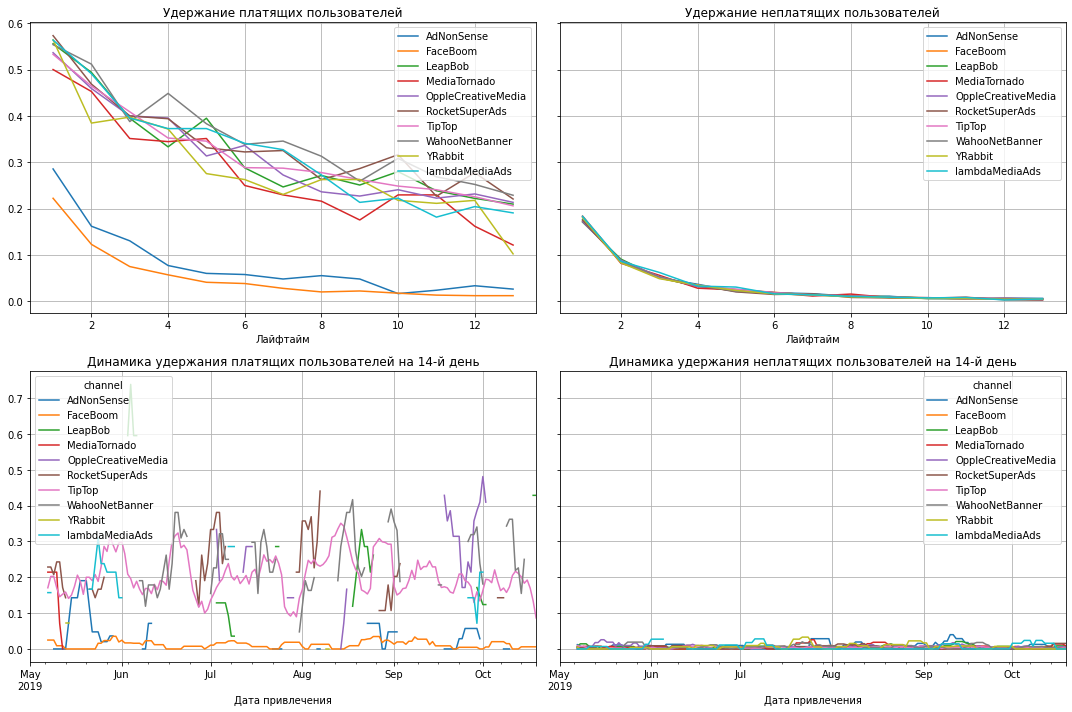

In [37]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

*Удержание платящих пользователей, привлеченных рекламными источниками AdNonSense и FaceBoom  на 14ый день менее 5%, намного ниже, чем удержание пользователей, привлеченных другими источниками. Удержание неплатящих пользователей для всех источников примерно одинаковое. В течение всего изучаемого периода удержание неплатящих пользователей находились на относительно стабильном низком уровне, удержание платящих "скачет", возможно из-за того, что платящих пользователей значительно меньше.*

**Промежуточный вывод:**

*Пользователи на ПК конвертируются хуже, чем пользователи с другими устройствами.*

*Пользователи из США конвертируются в 2 раза лучше, чем пользователи из других стран, но хуже удерживаются, хотя и не в 2 раза.*

*Конверсия привлеченных из разных рекламных источников пользователей очень сильно отличается друг от друга. Больше 10% на 14ый день у FaceBoom, AdNonSence, lambdaMediaAds.*

*Удержание платящих пользователей, привлеченных рекламными источниками AdNonSense и FaceBoom на 14ый день менее 5%, намного ниже, чем удержание пользователей, привлеченных другими источниками.*

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Самая низкая конверсия у пользователей PC, самая высокая - Mac и iPhone. Удержание примерно одинаковое на всех устройствах, показывает стабильно убывающий тренд. Динамику удержания в разбивке по датам можно посмотреть и в таблице. Называется она filtered_data в функции plot_retention (чтобы ее вывести, нужно в конце функции добавить return filtered_data).
    
Конверсия в США существенно больше, чем в других странах. При этом по удержанию занимают последнее место. 
    
По конверсии FaceBoom и AdNonSense лидируют, при этом по удержанию есть проблема "дырявого ведра", когда пользователи уходят из приложения в бóльших масштабах, чем ожидается. Новые пользователи, пришедшие из этих каналов, слабо конвертируются в постоянных клиентов. TipTop, отличающийся дорогой рекламой, по удержанию не выделяется на общем фоне. Качество аудитории в разных каналах различается. Может играть роль и фактор самого канала, в какой момент и как именно он цепляет внимание пользователя. Чтобы улучшить метрики в целом, важно развивать те каналы, которые позволяют эффективнее доносить ценность продукта. 

#### Анализ окупаемости рекламы с разбивкой по устройствам. Построение графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI

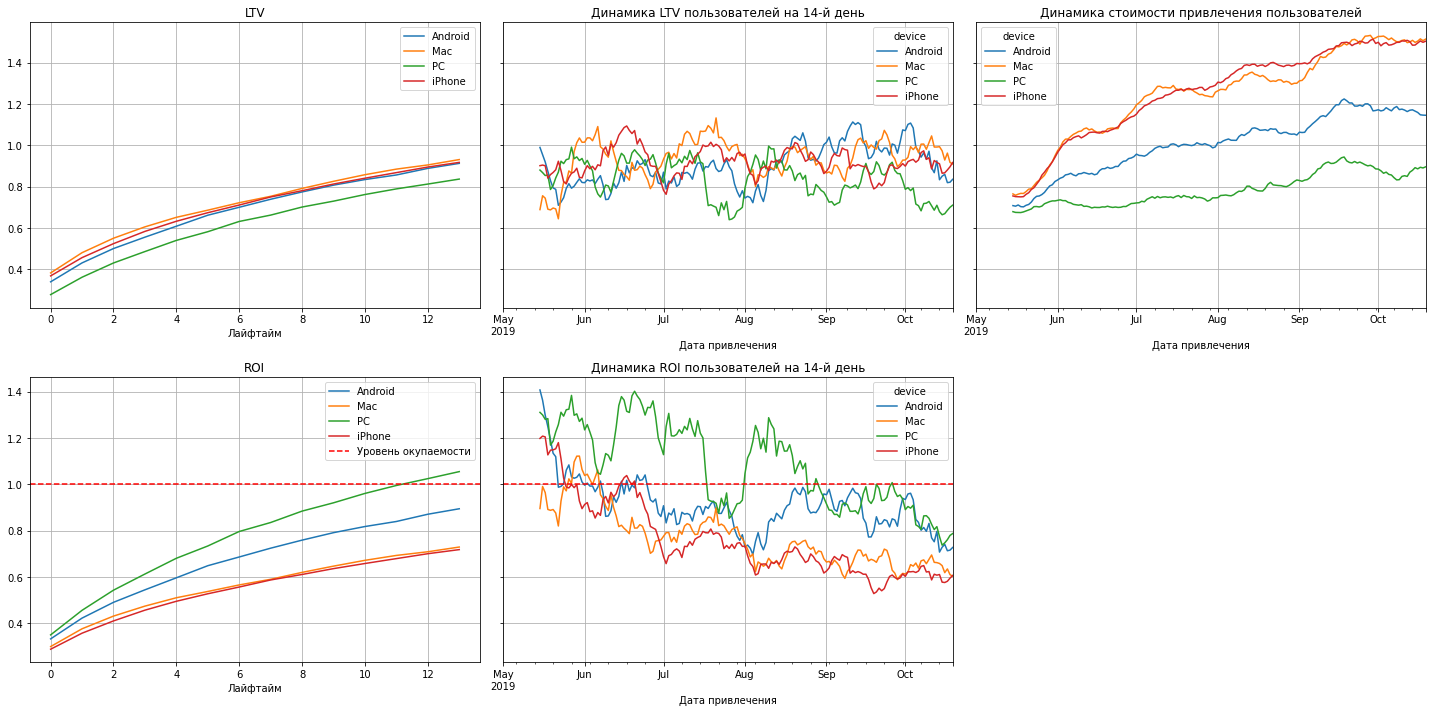

In [38]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=15
) 

*Пожизненная ценность клиентов с разными устройствами примерно одинаковая, у PC немного ниже, чем у остальных, в среднем достигает около 0.90 на 14ый день, в течение изучаемого диапазона времени была относительно стабильна, немного увеличиваясь и снижаясь раз в месяц. Стоимость привлечения клиента резко выросла для всех девайсов, особенно для Mac и IPhone, в конце мая-начале июня, с тех пор продолжая расти. Наибольшее ее значение на момент конца октября у Mac и IPhone - в районе 1.50. Таким образом окупаемость всех клиентов снижается, клиенты с PC в среднем окупались на 14ый день в течение изучаемого периода, но на конец окятбря - уже нет, как и клиенты с другими устройствами, и этот показатель продолжает снижаться.*

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Здесь мы видим, что с окупаемостью проблемы по всем устройствам, кроме PC. САС по устройствам Apple больше PC и Android. LTV у всех почти одинаковый, чуть ниже он у PC.


#### Анализ окупаемости рекламы с разбивкой по странам. Построение графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI

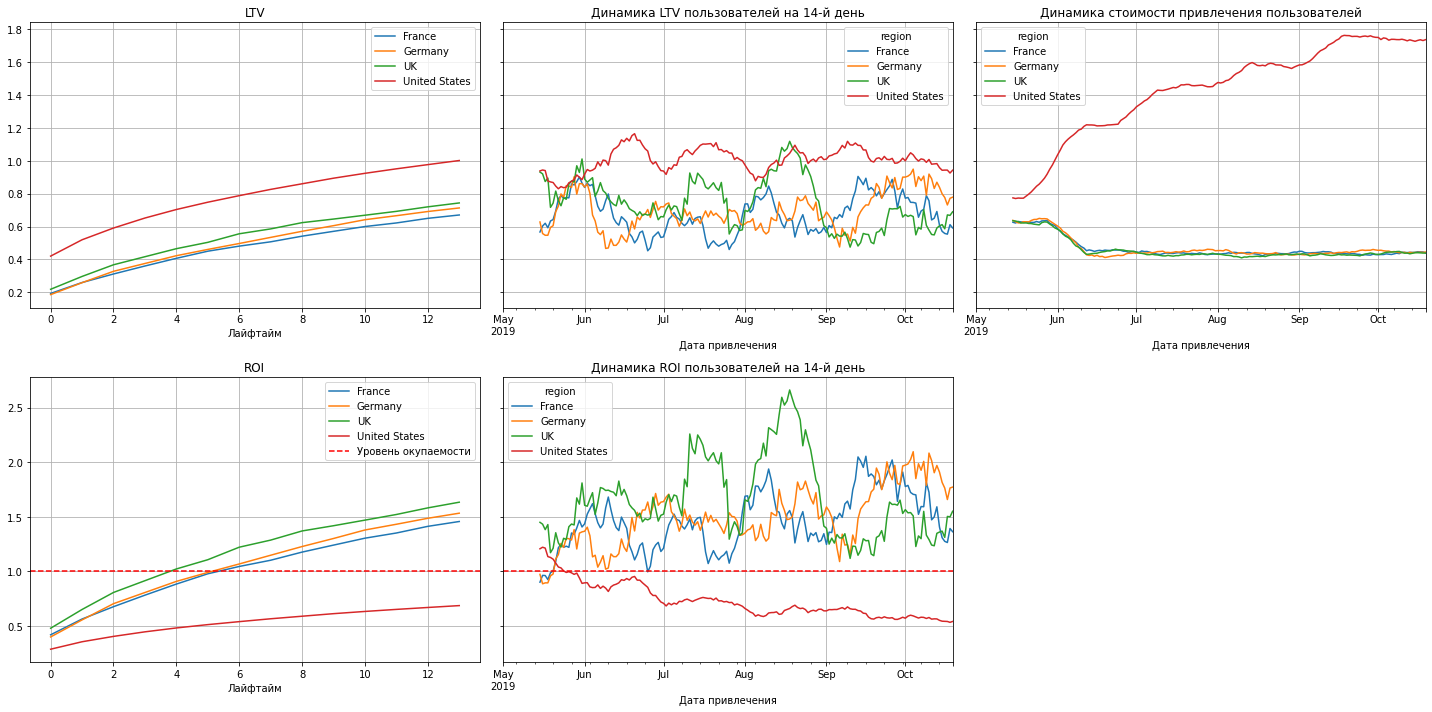

In [39]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=15
) 

*США лидируют по ценности клиентов - у них этот показатель на 14ый день составляет около 1.00, тогда как у остальных стран он в районе 0.70. В течение всего изучаемого времени LTV на 14ый день относительно стабилен для всех стран. Стоимость привлечения в течение всего изучаемого периода уменьшилась у всех стран, снизившись с примерно 0.60 до примерно 0.40, кроме США. На начало мая стоимость привлечения клиентов из США была приблизительно 0.80, затем САС США резко увеличилась и к концу октября достигла примерно 1.75. В результате окупаемость клиентов из США на 14ый день намного ниже чем у остальных стран. ROI США продолжает падать и уже составляет около 50%, пока у остальных стран остается относительно стабильным - около 150%.*

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Реклама не окупается только в США. И только в этой стране растет стоимость привлечения. При этом LTV - самый высокий среди представленных стран.
    
Также можно обратить внимание на всплески у одной из стран на графике с динамикой ROI

#### Анализ окупаемости рекламы с разбивкой по рекламным каналам. Построение графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI

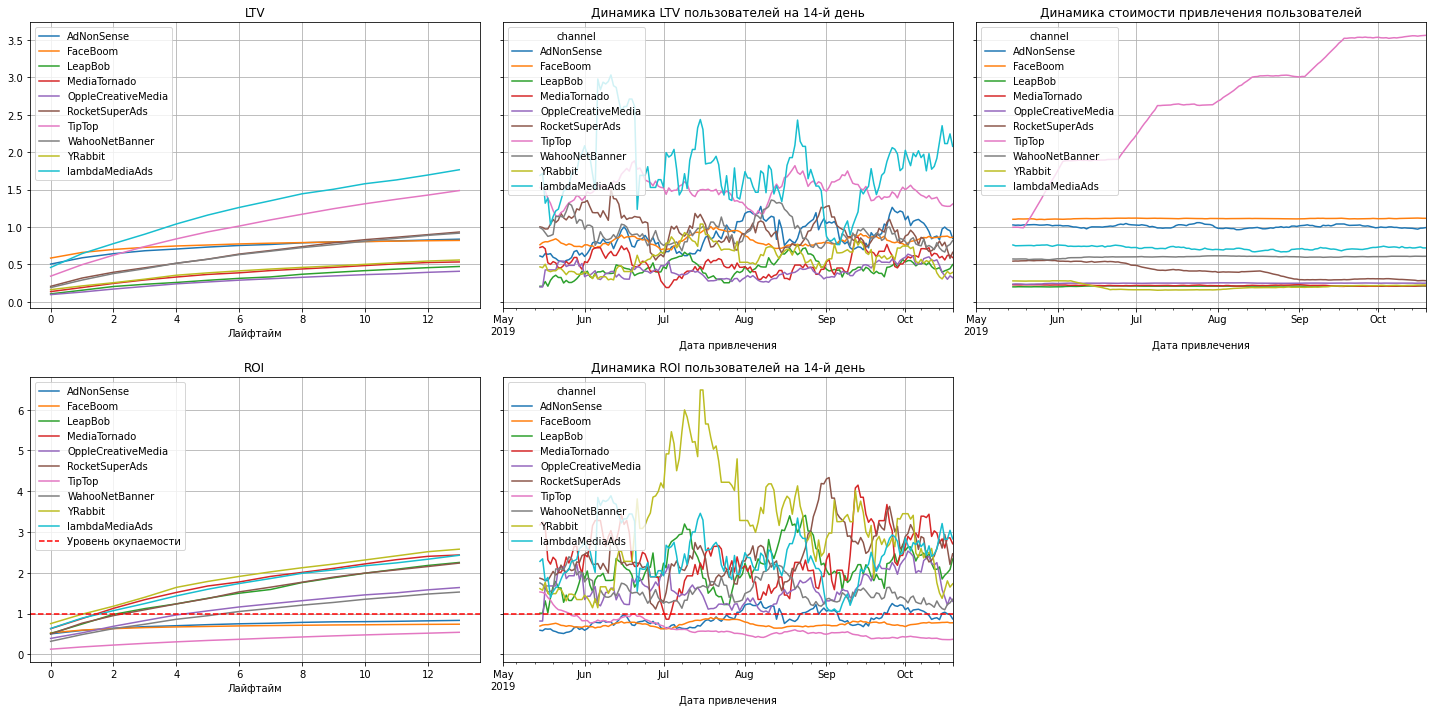

In [40]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=15
) 

*Пожизненная ценность клиентов привлеченных с помощью lambdaMediaAds и TipTop, на 14ый день около 1.50 - выше, чем у других каналов привлечения, для которых этот показатель в среднем не превышает 1.00. В течение изучаемого периода времени не наблюдается резкого взлета или падения LTV на 14ый день "жизни". Стоимость привлечения клиентов остается стабильной с начала мая по конец октября для всех каналов привлечения, кроме TipTop. CAC этого канала составляла около 1.00, как и у некоторых других рекламных каналов, но затем выросла до 3.50. Из-за этого окупаемость клиентов, привличенных через TipTop ниже, чем у всех остальных. ROI YRabbit резко увеличилась в середине июля до приблизительно 600%, затем опустилась обратно до примерно 200%, возможно нестабильность вызвана малым числом платящих клиентов, привлеченных через этот реклманый канал.*

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Лидерами по LTV являются lambdaMediaAds и TipTop. Не окупаются три канала. У канала TipTop стоимость привлечения пользователей заметно больше, чем у других каналов. Дорогая реклама приносит убыток компании. 


Реклама, направленная на привлечение пользователей перестала окупаться, негативное влияние на общую окупаемость оказывают показатели окупаемости пользователей, привлеченных с помощью TipTop, живущих в США, владеющих Mac или IPhone. Проблемы окупаемости вызваны увеличением стоимости привлечения пользователей.

In [41]:
region_channel_cac = profiles_filtered.groupby(['region','channel']).agg({'acquisition_cost':'mean'})
region_channel_cac.sort_values(by='acquisition_cost', ascending=False)

acquisition_cost
region        channel                             
United States TipTop                      2.799003
              FaceBoom                    1.113286
Germany       AdNonSense                  1.008435
UK            AdNonSense                  1.008224
France        AdNonSense                  1.007553
UK            lambdaMediaAds              0.727142
Germany       lambdaMediaAds              0.726176
France        lambdaMediaAds              0.721211
UK            WahooNetBanner              0.602361
France        WahooNetBanner              0.602200
Germany       WahooNetBanner              0.602161
United States RocketSuperAds              0.412095
Germany       OppleCreativeMedia          0.250091
UK            OppleCreativeMedia          0.250059
France        OppleCreativeMedia          0.249862
United States YRabbit                     0.218975
              MediaTornado                0.218717
Germany       LeapBob                     0.210380
France        LeapBob                     0.210189
UK            LeapBob                     0.209983

In [42]:
device_channel_cac = profiles_filtered.groupby(['device','channel']).agg({'acquisition_cost':'mean'})
device_channel_cac.sort_values(by='acquisition_cost', ascending=False).head(8)

,,acquisition_cost
device,channel,
PC,TipTop,2.823793
Mac,TipTop,2.811246
Android,TipTop,2.793025
iPhone,TipTop,2.789315
PC,FaceBoom,1.113440
Android,FaceBoom,1.113334
Mac,FaceBoom,1.113293
iPhone,FaceBoom,1.113224


In [43]:
user_channel_distr = profiles_filtered.groupby('channel').agg({'user_id':'count'})
user_channel_distr['part_of_all_users']=user_channel_distr['user_id']/user_channel_distr['user_id'].sum()
user_channel_distr.sort_values(by='part_of_all_users', ascending=False)

,user_id,part_of_all_users
channel,,
FaceBoom,29144,0.311471
TipTop,19561,0.209054
OppleCreativeMedia,8605,0.091964
LeapBob,8553,0.091408
WahooNetBanner,8553,0.091408
RocketSuperAds,4448,0.047537
MediaTornado,4364,0.046639
YRabbit,4312,0.046084
AdNonSense,3880,0.041467


In [44]:
user_reg_distr = profiles_filtered.groupby('region').agg({'user_id':'count'})
print(f'Всего привлечено рекламой {user_reg_distr["user_id"].sum()} пользователей')
print(f'Доля от пользователей привлеченных рекламой из США: {(61829/93569):.2%}')
user_reg_distr.sort_values(by='user_id', ascending=False)

Всего привлечено рекламой 93569 пользователей
Доля от пользователей привлеченных рекламой из США: 66.08%


,user_id
region,
United States,61829
UK,11154
France,11058
Germany,9528


*Вывод: главной причиной падения ROI является увеличение CAC для пользователей, привлеченных через TipTop, через которых мы привлекаем клиентов только из США. Так как 78% всех платящих пользователей - из США, очень важно найти рекламный источник с низкой стоимостью привлечения для этой страны, рекомендую привлекать клиентов не через TipTop, а обратить внимание на перспективный YRabbit или MediaTornado	и выяснить, занимаются ли привлечением клиентов из США lambdaMediaAds. Также не стоит пользоваться услугами таких неокупающихся маркетинговых каналов как FaceBoom, AdNonSense.*

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Также можно построить графики для анализа окупаемости рекламы с разбивкой по рекламным каналам для США и отдельно для европейских стран.
    
В частности, можно ответить на вопрос, куда лучше перенаправить рекламный бюджет в США. Какой источник показывает неплохую конверсию, хороший ROI и высокое удержание платящих пользователей на американском рынке?


### Выводы

Для того, чтобы разобраться в причинах убытков Procrastinate Pro+ в течение последних нескольких месяцев, были загружены данные, проведена предобработка, определены функции для рассчета и анализа LTV, ROI, удержания и конверсии, проведен исследовательский анализ данных, проанализированы расходы на маркетинг и проведена оценка окупаемости рекламы на основании данных о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Даны ответы на такие вопросы как: 
* откуда приходят пользователи и какими устройствами они пользуются;
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент;
* когда расходы на привлечение клиента окупаются;
* какие факторы мешают привлечению клиентов.

Пользователи на ПК конвертируются хуже, чем пользователи с другими устройствами.
Пользователи из США конвертируются в 2 раза лучше, чем пользователи из других стран, но хуже удерживаются, хотя и не в 2 раза.
Конверсия привлеченных из разных рекламных источников пользователей очень сильно отличается друг от друга. Больше 10% на 14ый день у FaceBoom, AdNonSence, lambdaMediaAds.
Удержание платящих пользователей, привлеченных рекламным источникам AdNonSense - около 3% и FaceBoom - около 1.5% на 14ый день, намного ниже, чем удержание пользователей, привлеченных другими источниками.

Основной причиной убытков Procrastinate Pro+ оказался резкий рост стоимости привлечения клиентов через один из основных рекламных источников - TipTop. Через него были привлечены 21% всех пользователей и 21% платящих пользователей. Пока CAC других маркетинговых каналов оставался примерно одинаковым в течение изучаемого периода времени, CAC TipTop вырос от 1.00 - 1 мая, до 3.50 - в конце октября. Также постоянные убытки приносили такие каналы как FaceBoom, AdNonSense. Так как пользователей из США привлекается намного больше, чем из остальных стран вместе взятых - 61829 из 93569 или 66.08% от общего числа, очень важно найти рекламный источник с низкой стоимостью привлечения для этой страны.

Рекомендую не привлекать клиентов через такие маркетинговые каналы как TipTop(высокая CAC, низкий ROI), FaceBoom(низкий ROI, высокая CAC, никзое удержание), AdNonSenseа(низкий ROI, никзое удержание), а увеличить вложение в рекламу через перспективный YRabbit(высокий ROI, низкая CAC) или MediaTornado(высокий ROI, низкая CAC) и выяснить, занимаются ли привлечением клиентов из США lambdaMediaAds(высокий ROI). 

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Вывод нужно будет перепроверить после удаления "органиков" и дополнить после анализа конверсии и удержания. В частности, какое удержание у FaceBoom?  
    
"обратить внимание на перспективный YRabbit или MediaTornado и выяснить, занимаются ли привлечением клиентов из США lambdaMediaAds" - какие преимущества у этих каналов по сравнению с другими каналами, что показывают метрики? Какая конверсия, например, у MediaTornado? Какой у него LTV?

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

😎 Перепроверил вывод, исправил.
    

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Итог v_1:</span>
    
В целом, работа сделана на хорошем уровне! Выполнено большинство ключевых этапов. Но есть замечания, которые необходимо доработать:
    
* отфильтровать органических пользователей и пересмотреть выводы в разделе "Оцените окупаемость рекламы"
* проанализировать конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам
* итоговый вывод
   
Также добавил рекомендации по улучшению проекта. Жду проект)

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Итог v_2:</span>

Спасибо за доработанные замечания! Проект принят. 
    
Дополнительно можно почитать о метриках продукта и метриках роста по [ссылке](https://gopractice.ru/product/cohort_analysis/)
    
Успехов в дальнейшем обучении!)